# Assignment 9

A RAID 1 in a very critical environment is composed by two disks that mirror the same data.
On average, every **MTTF = 100** days one of the disks fails.

In this case, recovery consist in replacing the broken disk, reconstruct the data, and return to normal operation.
This requires an average of **MTTR = 5** days.

Should also the second disk fail during the recovery stage, the system will go in a fault state, where to be restored, it will require a total reconstruction of the system from the backup.
This will take an average of **15** days.

## Requests
Considering a starting state where both disks are working:
- Draw the Markov Chain of the model
- Compute the infinitesimal generator and solve the corresponding differential equations
- Show the probability of the various states for the time T = [0, 10000] days

## Drawing of the Markov Chain of the model
In the drawing, the blue ellipses are the states of the chain and the edges are used to identify the rates of each exponential distribution.

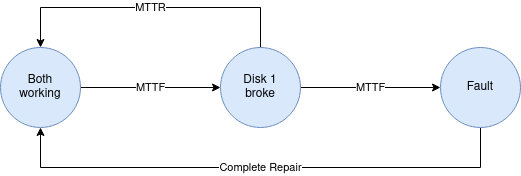

The distributions' rates associated with each edge are:

- *MTTF* :  $100$
- *MTTR* :  $5$
- *Complete Repair* :  $15$

## Computation of the infinitesimal generator

The infinitesimal generator for the system is 

$$Q = \begin{bmatrix}
-\frac{1}{MTTF} & \frac{1}{MTTF} & 0 \\
\frac{1}{MTTR} & -\frac{1}{MTTR}-\frac{1}{MTTF} & \frac{1}{MTTF} \\
\frac{1}{complete\_repair} & 0 & -\frac{1}{complete\_repair}
\end{bmatrix}$$

In [2]:
import numpy as np

MTTF = 100
MTTR = 5
comp_rep = 15

Q = np.array([
    [   -1/MTTF,              1/MTTF,            0],
    [    1/MTTR,  -(1/MTTR)-(1/MTTF),       1/MTTF],
    [1/comp_rep,                   0,  -1/comp_rep]
])

## Computation of the probabilities

We can compute the probabilities in the interval requested by using a differential equation solver.

Since the starting state is considered to be both disk working, the initial probability of the chain will be:
$$\pi(0) =  \begin{bmatrix}
1 & 0 & 0
\end{bmatrix}$$

In [3]:
import scipy.integrate as spi

def diff_function(t, pi):
    return np.matmul(pi, Q)

p0 = [1,0,0]

Tmax = 10000

#The Radau method choice is empirical: the values I obtain with it are monotonically crescent.
sol = spi.solve_ivp(diff_function, (0, Tmax), p0, method='Radau')

#sol2 = spi.odeint(diff_function, p0, np.linspace(0,Tmax,100), tfirst=True)
# If I use the odeint function (similar to ode45 in matlab) I obtain a sudden ange in the curve

In [4]:
for i in range(0,len(sol.y[0])):
    print("{}\t{}\t{}".format(sol.y[0][i], sol.y[1][i], sol.y[2][i]))

1.0	0.0	0.0
0.9996386009705148	0.00036133345342618443	6.557605892452625e-08
0.9961719479647265	0.0038203864077557656	7.665627517650756e-06
0.9829061701648484	0.016910244113208024	0.0001835857219443033
0.9706611446837986	0.028659637028628334	0.0006792182875833818
0.9616843849796423	0.03684145086452449	0.0014741641558693225
0.9557629812740184	0.04173838317237531	0.0024986355536985323
0.952227806573207	0.04413400809799051	0.0036381853290077012
0.9502349543357104	0.045005429733262756	0.004759615931449296
0.94908455042626	0.04518337432681515	0.005732075247768321
0.9484350858890176	0.045170086184732235	0.0063948279276812795
0.948174681590339	0.045153236197836503	0.006672082213402789
0.9480965631735715	0.04514779803809577	0.006755638789859968
0.9480822907794615	0.045146798767391236	0.006770910454520377
0.9480812902496054	0.04514672869103053	0.006771981060331734
0.948081265688604	0.045146726972630113	0.006772007338239042
0.9480812641533577	0.045146726865130826	0.006772008969044275
0.9480812637

In [5]:
print("At time {}, the probabilities are:\n"
      "Both working:\t{:%}\n"
      "One disk broke:\t{:%}\n"
      "Fault:\t{:%}".format(Tmax, sol.y[0][-1], sol.y[1][-1], sol.y[2][-1]))

At time 10000, the probabilities are:
Both working:	94.808126%
One disk broke:	4.514673%
Fault:	0.677201%


The following is a time plot of the three probabilities

In [6]:
from matplotlib import pyplot as plt
%matplotlib tk
plt.plot(sol.t, sol.y[0], label="Both working")
plt.plot(sol.t, sol.y[1], label="One disk broke")
plt.plot(sol.t, sol.y[2], label="Fault")
plt.legend()

### Steady state probabilities
We can also compute the steady state probabilities of the chain

In [7]:
Q_steady = Q.copy()
Q_steady[:,0] = [1, 1, 1]

ss_probabilities = np.matmul([1, 0, 0], np.linalg.inv(Q_steady))

print("The probabilities for each state are:\n"
        "Both working:\t{:%}\n"
        "One disk broke:\t{:%}\n"
        "Fault:\t{:%}".format(ss_probabilities[0], ss_probabilities[1], ss_probabilities[2]))

The probabilities for each state are:
Both working:	94.808126%
One disk broke:	4.514673%
Fault:	0.677201%
